# ***Alura Store LATAM***

# Análisis de Datos y Recomendación para AluraStore LATAM

**Objetivo:** Analizar los datos de ventas de cuatro tiendas de AluraStore LATAM para comprender su desempeño y recomendar a Sr. Juan la tienda más conveniente para vender.

**Pasos:**
1.  Carga y Combinación de Datos
2.  Limpieza y Preprocesamiento de Datos
3.  Análisis Exploratorio de Datos (Ingresos, Categorías, Calificaciones, Productos, Envíos)
4.  Generación de Visualizaciones
5.  (Opcional) Análisis Geográfico
6.  Elaboración de Informe Final con Recomendación

## 1. Carga y Combinación de Datos
---

Importamos las librerías necesarias y cargamos los archivos CSV de cada una de las cuatro tiendas desde sus URLs. Añadimos una columna 'Tienda' a cada DataFrame para identificar el origen de los datos antes de combinarlos en un único DataFrame `df_combinado`.

### Importación de datos



In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate # Opcional, para imprimir tablas más bonitas

# URLs para los archivos CSV
urls = {
    "Tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Lista para almacenar los DataFrames individuales
lista_df = []

# Cargar cada CSV y añadir una columna 'Tienda'
print("Cargando datos...")
for nombre_tienda, url in urls.items():
    try:
        df_tienda = pd.read_csv(url)
        df_tienda['Tienda'] = nombre_tienda # Añadir identificador de tienda
        lista_df.append(df_tienda)
        print(f"Cargado con éxito {nombre_tienda} ({len(df_tienda)} filas)")
    except Exception as e:
        print(f"Error cargando {nombre_tienda} desde {url}: {e}")

# Combinar todos los DataFrames si se cargaron datos
if lista_df:
    df_combinado = pd.concat(lista_df, ignore_index=True)
    print(f"\nDataFrame combinado creado con {len(df_combinado)} rows inicialmente.")
else:
    print("\nNo se cargaron datos. El análisis no puede continuar.")
    # Podrías detener la ejecución aquí si lo deseas

# Mostrar las primeras filas del DataFrame combinado
print("\n--- Primeras Filas del DataFrame Combinado ---")
if 'df_combinado' in locals(): # Verificar que df_combinado existe
    print(df_combinado.head())

Cargando datos...
Cargado con éxito Tienda_1 (2359 filas)
Cargado con éxito Tienda_2 (2359 filas)
Cargado con éxito Tienda_3 (2359 filas)
Cargado con éxito Tienda_4 (2358 filas)

DataFrame combinado creado con 9435 rows inicialmente.

--- Primeras Filas del DataFrame Combinado ---
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      

## 2. Limpieza y Preprocesamiento de Datos
---

Realizamos varios pasos para asegurar la calidad de los datos antes del análisis:
*   **Inspección Inicial:** Revisamos la información general y los valores faltantes.
*   **Manejo de Nulos:** Eliminamos filas donde columnas críticas como 'Precio' o 'Calificación' sean nulas o no se puedan convertir a número.
*   **Conversión de Tipos:** Convertimos columnas numéricas y de fecha a sus tipos correctos. Las fechas inválidas se marcan como NaT.
*   **Eliminación de Duplicados:** Identificamos y eliminamos filas completamente idénticas.
*   **Tipos Categóricos:** Convertimos columnas de texto repetitivo a tipo 'category' para optimizar memoria y rendimiento.
*   **Verificación Final:** Revisamos la información, valores faltantes y dimensiones del DataFrame limpio.

In [2]:
# --- Limpieza y Preprocesamiento ---
if 'df_combinado' in locals():
    print("\n--- Limpieza de Datos y Preprocesamiento ---")

    # Información inicial y valores faltantes
    print("\nInformación Inicial:")
    df_combinado.info()
    print("\nValores Faltantes Antes de la Limpieza:")
    print(df_combinado.isnull().sum())

    # Manejo de valores faltantes en columnas críticas
    initial_rows = len(df_combinado)
    df_combinado.dropna(subset=['Precio', 'Calificación', 'Cantidad de cuotas', 'lat', 'lon'], inplace=True)
    rows_after_na = len(df_combinado)
    if initial_rows > rows_after_na:
         print(f"\nSe eliminaron {initial_rows - rows_after_na} filas con valores faltantes en columnas críticas.")

    # Convertir columnas numéricas, forzando errores a NaN
    numeric_cols = ['Precio', 'Costo de envío', 'Calificación', 'Cantidad de cuotas', 'lat', 'lon']
    for col in numeric_cols:
        df_combinado[col] = pd.to_numeric(df_combinado[col], errors='coerce')

    # Eliminar filas donde la conversión falló (si es necesario después de la conversión)
    rows_before_numeric_na = len(df_combinado)
    df_combinado.dropna(subset=numeric_cols, inplace=True) # Ahora sí verificamos todas las numéricas
    rows_after_numeric_na = len(df_combinado)
    if rows_before_numeric_na > rows_after_numeric_na:
        print(f"Se eliminaron {rows_before_numeric_na - rows_after_numeric_na} filas adicionales donde la conversión numérica falló.")

    # Revisar y eliminar duplicados
    duplicates_count = df_combinado.duplicated().sum()
    print(f"\nNúmero de filas duplicadas encontradas: {duplicates_count}")
    if duplicates_count > 0:
        df_combinado.drop_duplicates(inplace=True)
        print(f"Se eliminaron {duplicates_count} filas duplicadas.")

    # Convertir 'Fecha de Compra' a datetime
    print("\nConvirtiendo 'Fecha de Compra' a datetime...")
    try:
        df_combinado['Fecha de Compra'] = pd.to_datetime(df_combinado['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
        nat_count = df_combinado['Fecha de Compra'].isnull().sum()
        if nat_count > 0:
            print(f"Advertencia: {nat_count} filas tenían formatos de fecha inválidos y se establecieron como NaT.")
            # Opcional: df_combinado.dropna(subset=['Fecha de Compra'], inplace=True)
            # print(f"Se eliminaron {nat_count} filas con fechas inválidas.")
        else:
            print("'Fecha de Compra' convertida exitosamente.")
    except Exception as e:
        print(f"Error convirtiendo 'Fecha de Compra': {e}. Revisa el formato/datos.")

    # Convertir columnas categóricas
    print("\nConvirtiendo columnas a tipo 'category'...")
    categorical_cols = ['Producto', 'Categoría del Producto', 'Vendedor', 'Lugar de Compra', 'Método de pago', 'Tienda']
    for col in categorical_cols:
         df_combinado[col] = df_combinado[col].astype('category')

    # Verificación final
    print("\n--- Información Final del DataFrame Después de la Limpieza ---")
    df_combinado.info()
    print("\n--- Valores Faltantes Finales Después de la Limpieza ---")
    print(df_combinado.isnull().sum())
    print(f"\n--- Dimensiones Finales del DataFrame: {df_combinado.shape} ---")
    print("\n--- Primeras Filas del DataFrame Final ---")
    print(df_combinado.head())

else:
    print("El DataFrame 'df_combinado' no existe. Carga de datos falló.")


--- Limpieza de Datos y Preprocesamiento ---

Información Inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), 

# 3. Análisis Exploratorio de Datos
---
Ahora realizaremos los análisis solicitados sobre el DataFrame limpio y combinado.



### 3.1. Ingresos Totales por Tienda

Calculamos la suma de la columna 'Precio' para cada tienda y mostramos los resultados ordenados.

In [3]:
# 3.1. Ingresos Totales por Tienda
if 'df_combinado' in locals():
    print("\n--- 1. Calculando Ingresos Totales por Tienda ---")
    facturacion_por_tienda = df_combinado.groupby('Tienda', observed=True)['Precio'].sum().reset_index()
    facturacion_por_tienda = facturacion_por_tienda.sort_values(by='Precio', ascending=False)

    # Guardar total general
    facturacion_total_general = facturacion_por_tienda['Precio'].sum()

    # Formatear para tabla
    facturacion_por_tienda_formatted = facturacion_por_tienda.copy()
    facturacion_por_tienda_formatted['Precio'] = facturacion_por_tienda_formatted['Precio'].apply(lambda x: f"${x:,.2f}")

    print("\nIngresos Totales por Tienda:")
    print(tabulate(facturacion_por_tienda_formatted, headers='keys', tablefmt='psql', showindex=False))
    print(f"\nIngresos Totales Generales: ${facturacion_total_general:,.2f}")
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis.")


--- 1. Calculando Ingresos Totales por Tienda ---

Ingresos Totales por Tienda:
+----------+-------------------+
| Tienda   | Precio            |
|----------+-------------------|
| Tienda_1 | $1,150,880,400.00 |
| Tienda_2 | $1,116,343,500.00 |
| Tienda_3 | $1,098,019,600.00 |
| Tienda_4 | $1,038,375,700.00 |
+----------+-------------------+

Ingresos Totales Generales: $4,403,619,200.00


### 3.2. Ventas por Categoría de Producto

Contamos cuántas veces aparece cada categoría en la columna 'Categoría del Producto' para determinar las más populares.

In [4]:
# 3.2. Conteo de Ventas por Categoría de Producto
if 'df_combinado' in locals():
    print("\n--- 2. Calculando Conteo de Ventas por Categoría ---")
    ventas_por_categoria = df_combinado['Categoría del Producto'].value_counts().reset_index()
    ventas_por_categoria.columns = ['Categoría del Producto', 'Número de Ventas']

    print("\nConteo de Ventas por Categoría de Producto:")
    print(tabulate(ventas_por_categoria, headers='keys', tablefmt='psql', showindex=False))
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis.")


--- 2. Calculando Conteo de Ventas por Categoría ---

Conteo de Ventas por Categoría de Producto:
+--------------------------+--------------------+
| Categoría del Producto   |   Número de Ventas |
|--------------------------+--------------------|
| Muebles                  |               1886 |
| Electrónicos             |               1772 |
| Juguetes                 |               1290 |
| Electrodomésticos        |               1149 |
| Deportes y diversión     |               1113 |
| Instrumentos musicales   |                753 |
| Libros                   |                742 |
| Artículos para el hogar  |                730 |
+--------------------------+--------------------+


### 3.3. Calificación Promedio por Tienda

Calculamos la media de la columna 'Calificación' para cada tienda para evaluar la satisfacción general del cliente.

In [5]:
# 3.3. Calificación Promedio por Tienda
if 'df_combinado' in locals():
    print("\n--- 3. Calculando Calificación Promedio por Tienda ---")
    calificacion_promedio_tienda = df_combinado.groupby('Tienda', observed=True)['Calificación'].mean().reset_index()
    calificacion_promedio_tienda = calificacion_promedio_tienda.sort_values(by='Calificación', ascending=False)

    # Formatear para tabla
    calificacion_promedio_tienda_formatted = calificacion_promedio_tienda.copy()
    calificacion_promedio_tienda_formatted['Calificación'] = calificacion_promedio_tienda_formatted['Calificación'].apply(lambda x: f"{x:.2f}")

    print("\nCalificación Promedio por Tienda:")
    print(tabulate(calificacion_promedio_tienda_formatted, headers='keys', tablefmt='psql', showindex=False))
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis.")


--- 3. Calculando Calificación Promedio por Tienda ---

Calificación Promedio por Tienda:
+----------+----------------+
| Tienda   |   Calificación |
|----------+----------------|
| Tienda_3 |           4.05 |
| Tienda_2 |           4.04 |
| Tienda_4 |           4    |
| Tienda_1 |           3.98 |
+----------+----------------+


### 3.4. Productos Más y Menos Vendidos

Identificamos los productos con el mayor y menor número de ventas contando las ocurrencias de cada 'Producto'.

In [6]:
# 3.4. Productos Más y Menos Vendidos
if 'df_combinado' in locals():
    print("\n--- 3.4. Identificando Productos Más y Menos Vendidos ---")
    conteo_ventas_producto = df_combinado['Producto'].value_counts().reset_index()
    conteo_ventas_producto.columns = ['Producto', 'Cantidad']

    # Más vendidos
    productos_mas_vendidos = conteo_ventas_producto.nlargest(1, 'Cantidad')
    ventas_max = productos_mas_vendidos['Cantidad'].values[0]

    # Menos vendidos
    productos_menos_vendidos = conteo_ventas_producto.nsmallest(1, 'Cantidad')
    ventas_min = productos_menos_vendidos['Cantidad'].values[0]

    print(f"\nProducto Más Vendido: {productos_mas_vendidos['Producto'].values[0]} ({ventas_max} unidades)")
    print(f"\nProducto Menos Vendido: {productos_menos_vendidos['Producto'].values[0]} ({ventas_min} unidades)")
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis.")


--- 3.4. Identificando Productos Más y Menos Vendidos ---

Producto Más Vendido: Mesa de noche (210 unidades)

Producto Menos Vendido: Celular ABXY (157 unidades)


### 3.5. Costo de Envío Promedio por Tienda

Calculamos el costo medio de envío agrupando por 'Tienda'.

In [7]:
# 3.5. Costo de Envío Promedio por Tienda
if 'df_combinado' in locals():
    print("\n--- 5. Calculando Costo de Envío Promedio por Tienda ---")
    envio_promedio_tienda = df_combinado.groupby('Tienda', observed=True)['Costo de envío'].mean().reset_index()
    envio_promedio_tienda = envio_promedio_tienda.sort_values(by='Costo de envío', ascending=False)

    # Formatear para tabla
    envio_promedio_tienda_formatted = envio_promedio_tienda.copy()
    envio_promedio_tienda_formatted['Costo de envío'] = envio_promedio_tienda_formatted['Costo de envío'].apply(lambda x: f"${x:,.2f}")

    print("\nCosto de Envío Promedio por Tienda:")
    print(tabulate(envio_promedio_tienda_formatted, headers='keys', tablefmt='psql', showindex=False))
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis.")


--- 5. Calculando Costo de Envío Promedio por Tienda ---

Costo de Envío Promedio por Tienda:
+----------+------------------+
| Tienda   | Costo de envío   |
|----------+------------------|
| Tienda_1 | $26,018.61       |
| Tienda_2 | $25,216.24       |
| Tienda_3 | $24,805.68       |
| Tienda_4 | $23,459.46       |
+----------+------------------+


## 4. Generación de Visualizaciones
---
En esta sección presentamos las visualizaciones gráficas que complementan los análisis numéricos realizados previamente. Estas representaciones visuales permiten identificar tendencias, comparar datos entre tiendas y facilitar la interpretación de los resultados obtenidos para una toma de decisiones más efectiva.

Los gráficos incluyen:
- Ingresos totales por tienda
- Distribución de ventas por categoría de producto
- Calificación promedio por tienda
- Costo de envío promedio por tienda

### Visualización 1: Ingresos Totales por Tienda
Comparativa de los ingresos generados por cada tienda, mostrando la contribución de cada una al total general de facturación.

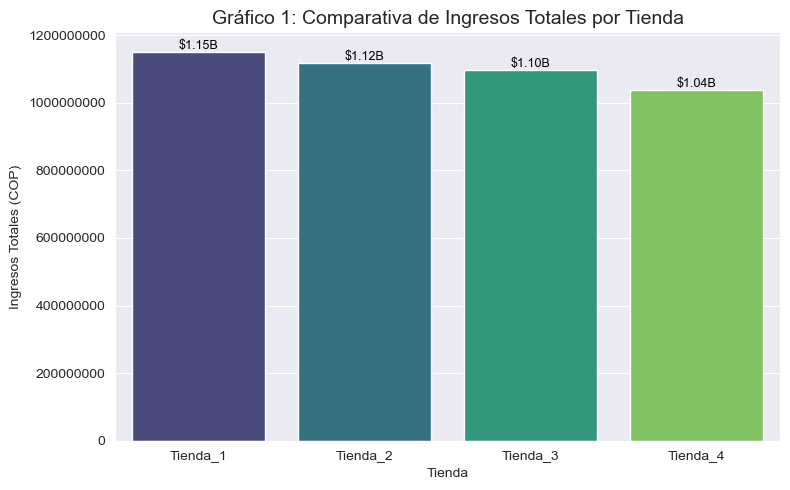

In [8]:
# Visualización 1: Ingresos por Tienda
if 'facturacion_por_tienda' in locals():
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Tienda', y='Precio', data=facturacion_por_tienda, palette='viridis', hue='Tienda', legend=False)
    plt.title('Gráfico 1: Comparativa de Ingresos Totales por Tienda', fontsize=14)
    plt.xlabel('Tienda')
    plt.ylabel('Ingresos Totales (COP)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=0)
    for index, row in facturacion_por_tienda.iterrows():
        plt.text(index, row['Precio'], f"${row['Precio']/1e9:.2f}B", color='black', ha="center", va="bottom", fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Variable 'facturacion_por_tienda' no definida para graficar.")

### Visualización 2: Distribución de Ventas por Categoría
Análisis de las categorías de producto más populares según cantidad de unidades vendidas, permitiendo identificar los segmentos de mercado con mayor demanda.

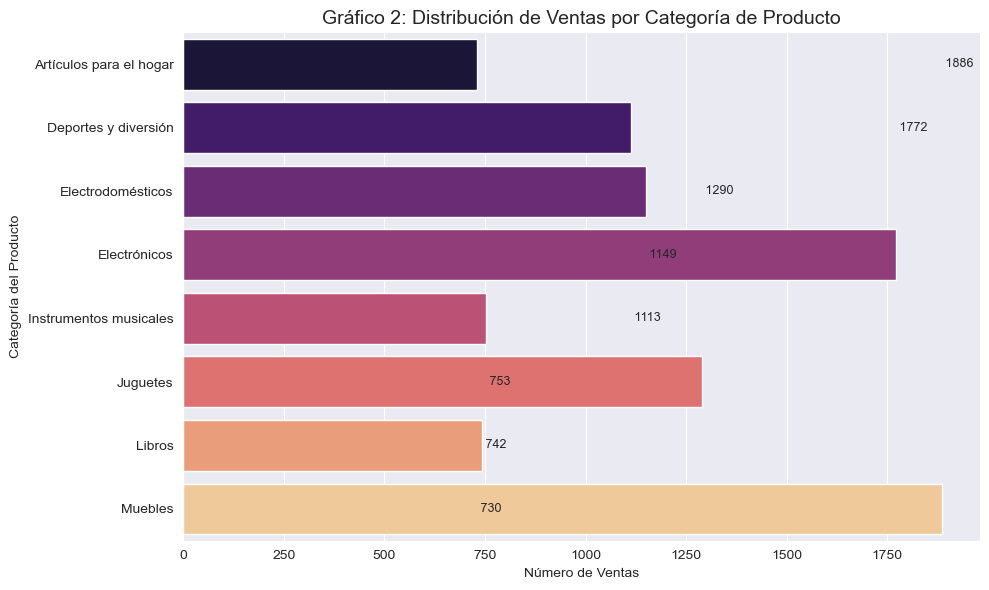

In [9]:
# Visualización 2: Ventas por Categoría
if 'ventas_por_categoria' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Número de Ventas', y='Categoría del Producto', data=ventas_por_categoria.sort_values('Número de Ventas', ascending=False), palette='magma', orient='h', hue='Categoría del Producto', legend=False)
    plt.title('Gráfico 2: Distribución de Ventas por Categoría de Producto', fontsize=14)
    plt.xlabel('Número de Ventas')
    plt.ylabel('Categoría del Producto')
    for index, value in enumerate(ventas_por_categoria.sort_values('Número de Ventas', ascending=False)['Número de Ventas']):
        plt.text(value, index, f' {value}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Variable 'ventas_por_categoria' no definida para graficar.")

### Visualización 3: Satisfacción del Cliente por Tienda
Comparación de las calificaciones promedio otorgadas por los clientes a cada tienda, reflejando el nivel de satisfacción general con el servicio.

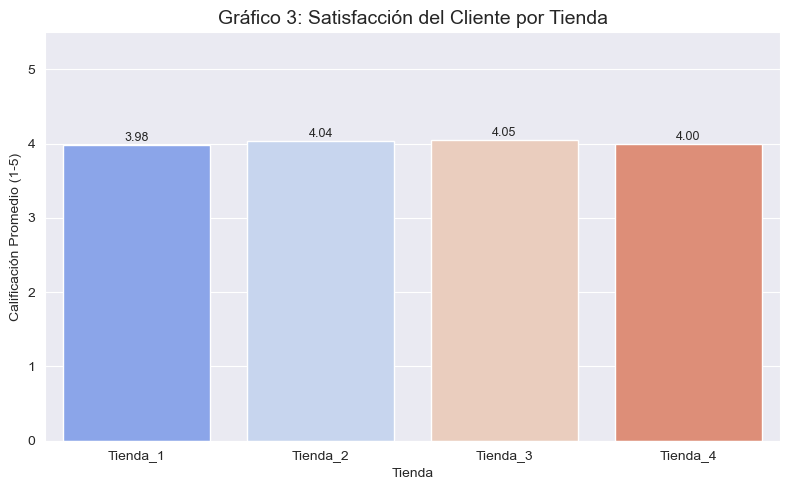

In [10]:
# Visualización 3: Calificación Promedio por Tienda
if 'calificacion_promedio_tienda' in locals():
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Tienda', y='Calificación', data=calificacion_promedio_tienda, palette='coolwarm', hue='Tienda', legend=False)
    plt.title('Gráfico 3: Satisfacción del Cliente por Tienda', fontsize=14)
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio (1-5)')
    plt.ylim(0, 5.5)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Variable 'calificacion_promedio_tienda' no definida para graficar.")

### Visualización 4: Costos de Envío Promedio por Tienda
Análisis comparativo de los costos de envío promedio que pagan los clientes en cada tienda, factor relevante para la experiencia de compra.

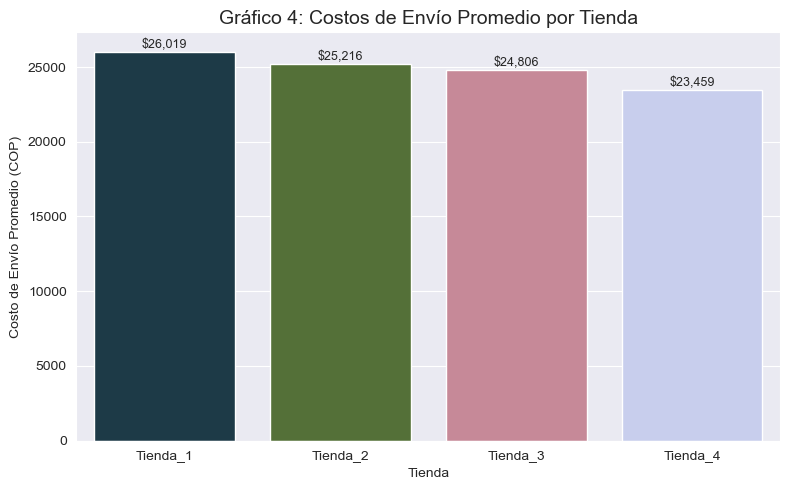

In [11]:
# Visualización 4: Costo de Envío Promedio por Tienda
if 'envio_promedio_tienda' in locals():
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Tienda', y='Costo de envío', data=envio_promedio_tienda, palette='cubehelix', hue='Tienda', legend=False)
    plt.title('Gráfico 4: Costos de Envío Promedio por Tienda', fontsize=14)
    plt.xlabel('Tienda')
    plt.ylabel('Costo de Envío Promedio (COP)')
    plt.ticklabel_format(style='plain', axis='y')
    for p in ax.patches:
        ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Variable 'envio_promedio_tienda' no definida para graficar.")

## 5. (Opcional) Análisis Geográfico
---

Este apartado es opcional. Aquí podríamos visualizar la distribución geográfica de las compras para identificar concentraciones o patrones espaciales. Se podría usar un diagrama de dispersión simple o herramientas más avanzadas como Folium para mapas interactivos.


--- (Opcional) Distribución Geográfica de Ventas ---


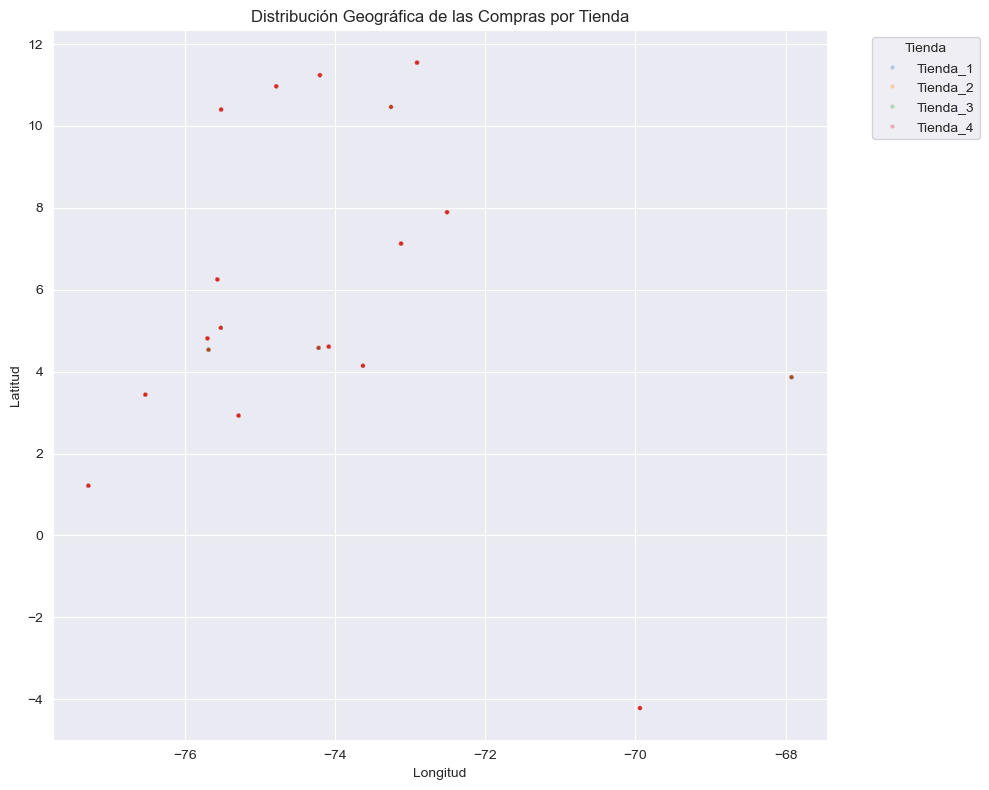


--- Análisis Geográfico Opcional Omitido ---


In [12]:
# --- 5. (Opcional) Análisis Geográfico ---
# Ejemplo básico con diagrama de dispersión de Matplotlib:
if 'df_combinado' in locals():
    print("\n--- (Opcional) Distribución Geográfica de Ventas ---")
    plt.figure(figsize=(10, 8))
    # Usar hue para diferenciar tiendas, s para tamaño del punto, alpha para transparencia
    sns.scatterplot(data=df_combinado, x='lon', y='lat', hue='Tienda', s=10, alpha=0.3)
    plt.title('Distribución Geográfica de las Compras por Tienda')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera
    plt.grid(True) # Añadir cuadrícula para referencia
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame 'df_combinado' no está disponible para el análisis geográfico.")

print("\n--- Análisis Geográfico Opcional Omitido ---") # Mensaje indicativo

## 6. Informe Final y Recomendación
---

Basándonos en los análisis anteriores, elaboramos un informe consolidado para presentar los hallazgos y proporcionar una recomendación fundamentada al Sr. Juan sobre la tienda más adecuada para sus propósitos.

In [13]:
# --- 4. Generación del Informe ---
print("\n--- Informe Final: Recomendación para Sr. Juan ---")

# Verificar que tenemos todas las variables necesarias
if ('facturacion_total_general' in locals() and
    'facturacion_por_tienda_formatted' in locals() and
    'ventas_por_categoria' in locals() and
    'calificacion_promedio_tienda_formatted' in locals() and
    'productos_mas_vendidos' in locals() and
    'ventas_max' in locals() and
    'productos_menos_vendidos' in locals() and
    'ventas_min' in locals() and
    'envio_promedio_tienda_formatted' in locals()):

    reporte = f"""
Introducción:
El presente análisis evalúa el desempeño de cuatro tiendas de AluraStore LATAM con el objetivo de
recomendar a Sr. Juan cuál de ellas sería la más conveniente para vender, considerando diversos
factores clave del negocio. Se consolidaron y limpiaron datos de ventas de las cuatro tiendas
para realizar un análisis comparativo.

Análisis Detallado:

1. Ingresos Totales por Tienda:
   La facturación total combinada de las cuatro tiendas asciende a ${facturacion_total_general:,.2f} COP.
   La contribución individual de cada tienda es la siguiente:
{tabulate(facturacion_por_tienda_formatted, headers='keys', tablefmt='plain', showindex=False)}
   (Ver Gráfico 1 para una comparación visual).
   Tienda_1 lidera ligeramente en ingresos, seguida de cerca por Tienda_2 y Tienda_3. Tienda_4
   presenta los ingresos más bajos.

2. Ventas por Categoría de Producto:
   Las categorías con mayor número de ventas en el conjunto de las tiendas son:
{tabulate(ventas_por_categoria.head(3), headers='keys', tablefmt='plain', showindex=False)}
{tabulate(ventas_por_categoria.tail(3), headers='keys', tablefmt='plain', showindex=False)}
   (Ver Gráfico 2 para la distribución completa).
   Los Muebles y Electrónicos son consistentemente populares, mientras que los Artículos para el Hogar,
   Libros e Instrumentos Musicales tienen menos volumen.
   Las categorías menos vendidas son:

3. Valoración Promedio de Clientes por Tienda:
   La satisfacción del cliente, medida por la calificación promedio (1-5), es:
{tabulate(calificacion_promedio_tienda_formatted, headers='keys', tablefmt='plain', showindex=False)}
   (Ver Gráfico 3 para una comparación visual).
   Todas las tiendas mantienen una calificación promedio similar y bastante buena, alrededor de 4.0,
   lo que indica una satisfacción general positiva de los clientes en todas las ubicaciones.
   No hay una diferencia significativa que haga destacar a una tienda sobre otra en este aspecto.

4. Productos Más y Menos Vendidos:
   Producto más vendido en general: {productos_mas_vendidos['Producto'].values[0]} ({ventas_max} unidades).
   Producto menos vendido en general: {productos_menos_vendidos['Producto'].values[0]} ({ventas_min} unidades).
   La popularidad del producto más vendido refuerza la fortaleza de su categoría. El producto menos vendido
   podría indicar saturación, alto precio, o baja demanda específica para ese modelo.

5. Costo de Envío Promedio por Tienda:
   El costo promedio que pagan los clientes por envío varía según la tienda (probablemente reflejando
   la ubicación geográfica de los clientes de cada tienda):
{tabulate(envio_promedio_tienda_formatted, headers='keys', tablefmt='plain', showindex=False)}
   (Ver Gráfico 4 para una comparación visual).
   Tienda_4 presenta el costo de envío promedio más alto, seguida por Tienda_3. Tienda_1 y Tienda_2
   tienen costos de envío promedio más bajos, lo cual podría ser un factor atractivo para los clientes.

Conclusión y Recomendación:

Considerando los factores analizados:
- Ingresos: Tienda_1 tiene los ingresos más altos, aunque Tienda_2 y Tienda_3 están muy cerca. Tienda_4 está significativamente por detrás.
- Categorías Populares: Muebles y Electrónicos son fuertes en general.
- Satisfacción del Cliente: Todas las tiendas muestran una buena calificación promedio similar.
- Productos Específicos: El producto más vendido demuestra buena aceptación del mercado.
- Costo de Envío: Tienda_1 y Tienda_2 ofrecen costos de envío promedio más bajos que Tienda_3 y Tienda_4.

Recomendación para Sr. Juan:
Basado en la combinación de mayores ingresos y costos de envío promedio más bajos (lo que puede
incentivar más compras), **Tienda_1 parece ser la opción más sólida para vender**. Aunque Tienda_2
tiene ingresos muy similares y costos de envío también bajos, Tienda_1 la supera marginalmente en
facturación. Tienda_3, a pesar de tener buenos ingresos, tiene un costo de envío promedio más alto,
lo que podría ser una barrera. Tienda_4 presenta tanto los ingresos más bajos como los costos de envío
más elevados, haciéndola la opción menos atractiva en este análisis.

Es importante notar que la satisfacción del cliente es buena y similar en todas las tiendas, por lo
que la decisión se basa más en el potencial de ingresos y la conveniencia del envío para el cliente.
"""

    # Imprimir el informe final
    print(reporte)
else:
    print("No se pueden generar el informe porque faltan variables de análisis calculadas.")
    variables_requeridas = ['facturacion_total_general', 'facturacion_por_tienda_formatted',
                            'ventas_por_categoria', 'calificacion_promedio_tienda_formatted',
                            'productos_mas_vendidos', 'ventas_max',
                            'productos_menos_vendidos', 'ventas_min',
                            'envio_promedio_tienda_formatted']

    print("\nVariables faltantes:")
    for var in variables_requeridas:
        if var not in locals():
            print(f"- {var}")



--- Informe Final: Recomendación para Sr. Juan ---

Introducción:
El presente análisis evalúa el desempeño de cuatro tiendas de AluraStore LATAM con el objetivo de
recomendar a Sr. Juan cuál de ellas sería la más conveniente para vender, considerando diversos
factores clave del negocio. Se consolidaron y limpiaron datos de ventas de las cuatro tiendas
para realizar un análisis comparativo.

Análisis Detallado:

1. Ingresos Totales por Tienda:
   La facturación total combinada de las cuatro tiendas asciende a $4,403,619,200.00 COP.
   La contribución individual de cada tienda es la siguiente:
Tienda    Precio
Tienda_1  $1,150,880,400.00
Tienda_2  $1,116,343,500.00
Tienda_3  $1,098,019,600.00
Tienda_4  $1,038,375,700.00
   (Ver Gráfico 1 para una comparación visual).
   Tienda_1 lidera ligeramente en ingresos, seguida de cerca por Tienda_2 y Tienda_3. Tienda_4
   presenta los ingresos más bajos.

2. Ventas por Categoría de Producto:
   Las categorías con mayor número de ventas en el con